In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
customer_data = pd.read_csv('CodesoftML/Churn_Modelling.csv')
customer_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [49]:
x = customer_data.drop(columns='Exited')
y = customer_data['Exited']

In [50]:
cat_features = [col for col in customer_data.columns if customer_data[col].apply(lambda x: isinstance(x, str)).all()]
cat_features

['Surname', 'Geography', 'Gender']

In [51]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [52]:
transform = ColumnTransformer([('Categorical Variable Conversion',
                                OneHotEncoder(),
                                cat_features)],
                              remainder='passthrough')
transformed = transform.fit_transform(x)

In [53]:
transformed_df = pd.DataFrame(transformed.toarray())
transformed_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2937,2938,2939,2940,2941,2942,2943,2944,2945,2946
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,15634602.0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,15647311.0,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,15619304.0,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,15701354.0,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,15737888.0,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10


**RandomForestClassifier**

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [68]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_df, y, test_size=0.2)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [56]:
clf.score(X_test, y_test)

0.855

**LogisticRegression**

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
np.random.seed(42)
scaler = StandardScaler()
X = scaler.fit_transform(transformed_df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [61]:
mod = LogisticRegression()
mod.fit(X_train, y_train)
mod.score(X_test, y_test)

0.7605

**RidgeRigression**

In [66]:
from sklearn.svm import LinearSVC

In [67]:
mode = LinearSVC()
mode.fit(X_train, y_train)
mode.score(X_test, y_test)

0.8035

**Model Evaluation**
* Cross validation Score
* Confusion Matrix
* Classification Report
* Area under ROC Curve

**`cross_val_score`**

In [72]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, transformed_df, y, cv=5, scoring=None)

array([0.8415, 0.8645, 0.8495, 0.8615, 0.814 ])

**Area under ROC curve**

In [92]:
y_predict = clf.predict(X_test)
y_predict_proba = clf.predict_proba(X_test)
y_tpr = y_predict_proba[:,1]

In [74]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_tpr)

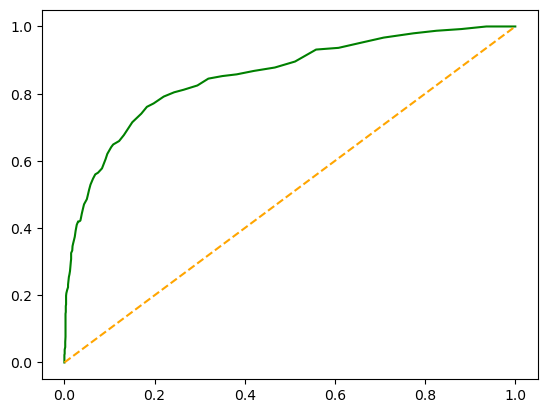

In [76]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='green', label='ROC Curve')
    plt.plot([0,1],[0,1], color='orange', label='Guessing', ls='--')
    plt.show()
plot_roc_curve(fpr, tpr)

In [77]:
roc_auc_score(y_test, y_tpr)

0.8530411637381621

**Confusion Matrix**

In [94]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predict)

In [95]:
pd.crosstab(y_test,
            y_predict,
            rownames=['Actual Values'],
            colnames=['Predicted Values'])

Predicted Values,0,1
Actual Values,,
0,1579,28
1,262,131


Text(41.25, 0.5, 'Actual Values')

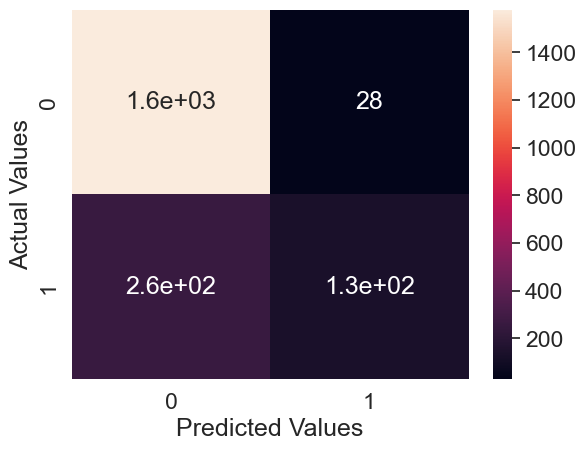

In [96]:
sns.set(font_scale=1.5)
sns.heatmap(confusion_matrix, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

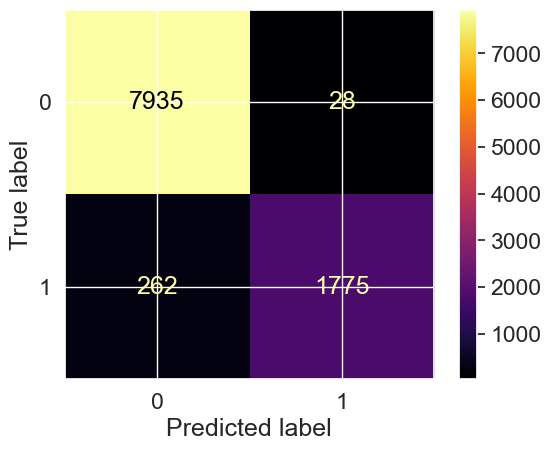

In [100]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=clf, X=transformed_df, y=y, cmap='inferno')

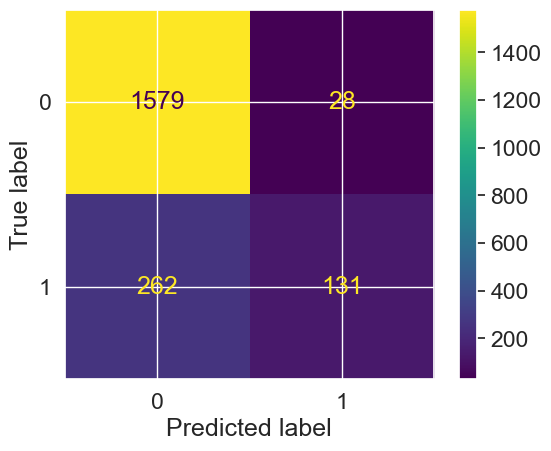

In [101]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

**Classification Report**

In [103]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1607
           1       0.82      0.33      0.47       393

    accuracy                           0.85      2000
   macro avg       0.84      0.66      0.70      2000
weighted avg       0.85      0.85      0.83      2000

